In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from citipy import citipy
from datetime import datetime
from scipy.stats import linregress

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [3]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

637

In [4]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
        

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | skalistyy
City not found. Skipping...
Processing Record 4 of Set 1 | naze
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | awbari
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | behbahan
Processing Record 11 of Set 1 | codrington
Processing Record 12 of Set 1 | chabahar
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | chemainus
Processing Record 15 of Set 1 | kieta
Processing Record 16 of Set 1 | azul
Processing Record 17 of Set 1 | airai
Processing Record 18 of Set 1 | garissa
Processing Record 19 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | kalashnikovo
Processing Rec

Processing Record 38 of Set 4 | samusu
City not found. Skipping...
Processing Record 39 of Set 4 | paamiut
Processing Record 40 of Set 4 | griffith
Processing Record 41 of Set 4 | caravelas
Processing Record 42 of Set 4 | la ronge
Processing Record 43 of Set 4 | severo-kurilsk
Processing Record 44 of Set 4 | wschowa
Processing Record 45 of Set 4 | nyurba
Processing Record 46 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 47 of Set 4 | basco
Processing Record 48 of Set 4 | ocampo
Processing Record 49 of Set 4 | upernavik
Processing Record 50 of Set 4 | butaritari
Processing Record 1 of Set 5 | srandakan
Processing Record 2 of Set 5 | bonthe
Processing Record 3 of Set 5 | san juan
Processing Record 4 of Set 5 | mumford
Processing Record 5 of Set 5 | clarksdale
Processing Record 6 of Set 5 | mocajuba
Processing Record 7 of Set 5 | storforshei
Processing Record 8 of Set 5 | bago
Processing Record 9 of Set 5 | havelock
Processing Record 10 of Set 5 | banepa
Processing 

Processing Record 32 of Set 8 | sibolga
Processing Record 33 of Set 8 | mirnyy
Processing Record 34 of Set 8 | mangrol
Processing Record 35 of Set 8 | tautira
Processing Record 36 of Set 8 | sar-e pul
Processing Record 37 of Set 8 | kavieng
Processing Record 38 of Set 8 | bud
Processing Record 39 of Set 8 | najran
Processing Record 40 of Set 8 | bogorodskoye
Processing Record 41 of Set 8 | temirtau
Processing Record 42 of Set 8 | lolua
City not found. Skipping...
Processing Record 43 of Set 8 | sindor
Processing Record 44 of Set 8 | kanigoro
Processing Record 45 of Set 8 | leshukonskoye
Processing Record 46 of Set 8 | kincardine
Processing Record 47 of Set 8 | gazli
Processing Record 48 of Set 8 | usinsk
Processing Record 49 of Set 8 | sakakah
Processing Record 50 of Set 8 | mecca
Processing Record 1 of Set 9 | litovko
Processing Record 2 of Set 9 | kijang
Processing Record 3 of Set 9 | innisfail
Processing Record 4 of Set 9 | rungata
City not found. Skipping...
Processing Record 5 of 

Processing Record 21 of Set 12 | portland
Processing Record 22 of Set 12 | saint-fabien
City not found. Skipping...
Processing Record 23 of Set 12 | harsin
Processing Record 24 of Set 12 | veraval
Processing Record 25 of Set 12 | mbour
Processing Record 26 of Set 12 | nishihara
Processing Record 27 of Set 12 | praya
Processing Record 28 of Set 12 | coahuayana
Processing Record 29 of Set 12 | dhrangadhra
Processing Record 30 of Set 12 | kankavli
City not found. Skipping...
Processing Record 31 of Set 12 | douglas
Processing Record 32 of Set 12 | tamale
Processing Record 33 of Set 12 | kapuskasing
Processing Record 34 of Set 12 | nago
Processing Record 35 of Set 12 | tancheng
Processing Record 36 of Set 12 | angoche
Processing Record 37 of Set 12 | francisco beltrao
Processing Record 38 of Set 12 | rzhev
Processing Record 39 of Set 12 | qingan
City not found. Skipping...
Processing Record 40 of Set 12 | grootfontein
Processing Record 41 of Set 12 | rundu
Processing Record 42 of Set 12 | 

In [5]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,75.92,68,65,5.17,PF,2020-05-09 05:27:13
1,Naze,28.37,129.48,77.00,78,40,12.75,JP,2020-05-09 05:27:13
2,Albany,42.60,-73.97,34.00,68,100,1.01,US,2020-05-09 05:27:13
3,Bluff,-46.60,168.33,58.60,78,3,5.91,NZ,2020-05-09 05:27:14
4,Tiksi,71.69,128.87,22.03,96,100,9.46,RU,2020-05-09 05:27:14
5,Awbari,26.59,12.78,73.87,27,82,10.74,LY,2020-05-09 05:27:14
6,Hobart,-42.88,147.33,55.40,58,75,6.93,AU,2020-05-09 05:23:25
7,Behbahan,30.60,50.24,87.80,20,40,2.24,IR,2020-05-09 05:25:07
8,Codrington,-38.27,141.97,52.29,63,96,23.53,AU,2020-05-09 05:27:14
9,Chabahar,25.29,60.64,86.16,57,0,4.09,IR,2020-05-09 05:27:15


In [6]:
# Reorder columns for csv file
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp',
                                      'Humidity', 'Cloudiness', 'Wind Speed']

reordered_city_data_df = city_data_df[new_column_order]

reordered_city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2020-05-09 05:27:13,-23.12,-134.97,75.92,68,65,5.17
1,Naze,JP,2020-05-09 05:27:13,28.37,129.48,77.00,78,40,12.75
2,Albany,US,2020-05-09 05:27:13,42.60,-73.97,34.00,68,100,1.01
3,Bluff,NZ,2020-05-09 05:27:14,-46.60,168.33,58.60,78,3,5.91
4,Tiksi,RU,2020-05-09 05:27:14,71.69,128.87,22.03,96,100,9.46


In [7]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [8]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

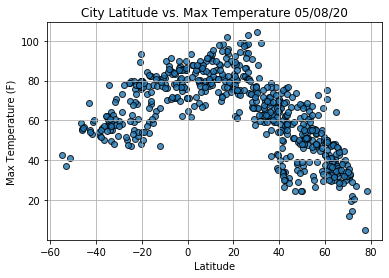

In [9]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

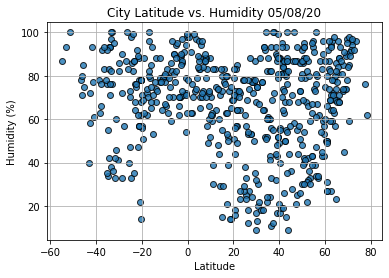

In [10]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

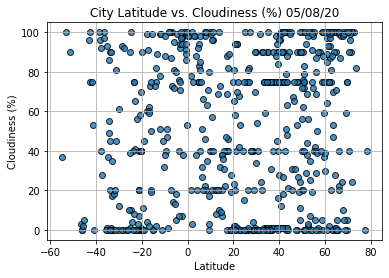

In [11]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

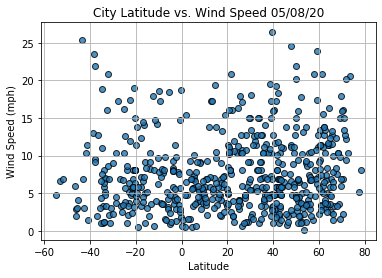

In [12]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [13]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [14]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

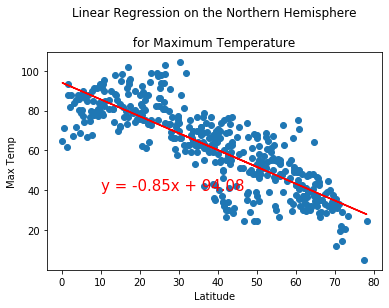

LinregressResult(slope=-0.8450279004492246, intercept=94.0785625054873, rvalue=-0.8180976758464501, pvalue=5.786170471347881e-103, stderr=0.028984710978244878)

In [15]:
#  Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, '''Linear Regression on the Northern Hemisphere
                                            \n for Maximum Temperature ''', 'Max Temp',(10,40))

linregress(x_values, y_values)

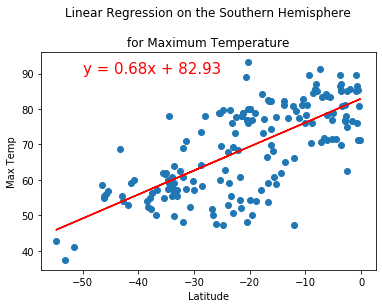

LinregressResult(slope=0.6760713031716387, intercept=82.92859600520543, rvalue=0.701545790844372, pvalue=8.39011125990839e-27, stderr=0.05267113690788627)

In [16]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, '''Linear Regression on the Southern Hemisphere
                                            \nfor Maximum Temperature''', 'Max Temp',(-50,90))

linregress(x_values, y_values)

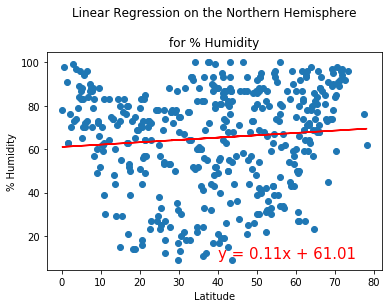

LinregressResult(slope=0.10739943932205522, intercept=61.0140098092643, rvalue=0.09119925364084407, pvalue=0.06123168759864726, stderr=0.05722324110227842)

In [17]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, '''Linear Regression on the Northern Hemisphere
                                            \nfor % Humidity''', '% Humidity',(40,10))

linregress(x_values, y_values)

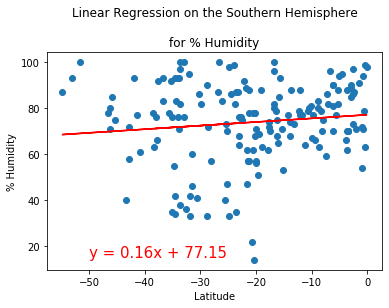

LinregressResult(slope=0.15718298465638672, intercept=77.15302832555791, rvalue=0.11934614118792049, pvalue=0.11890756342324925, stderr=0.10028997273827853)

In [18]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'''Linear Regression on the Southern Hemisphere
                                            \nfor % Humidity''', '% Humidity',(-50,15))

linregress(x_values, y_values)

In [19]:
# Refactor plot_linear_regression function
def plot_linear_regression_2(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    print("R-squared: %f" % r_value**2)
    print("P-Value: %f" % p_value)
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot and plot the regression line.
    plt.plot(x_values, y_values, 'o', label='Data Points')
    plt.plot(x_values, intercept + slope * x_values, 'r', label='Fitted Line')
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="darkred")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    
    plt.show()

R-squared: 0.013616
P-Value: 0.016480


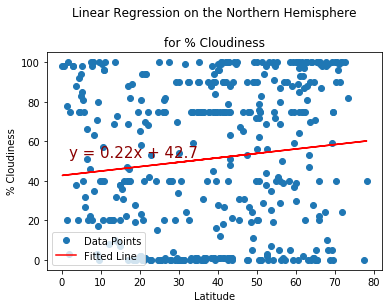

In [20]:
# Linear regression on the Northern Hemisphere for percent of cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression_2(x_values, y_values, '''Linear Regression on the Northern Hemisphere
                                            \nfor % Cloudiness''', '% Cloudiness',(2,52))

R-squared: 0.075372
P-Value: 0.000268


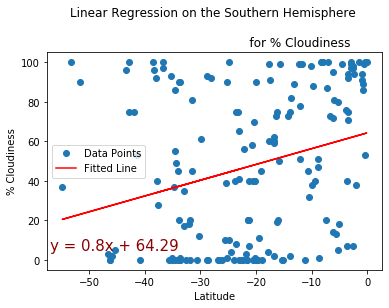

In [21]:
# Linear regression on the Southern Hemisphere for percent of cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression_2(x_values, y_values,'''Linear Regression on the Southern Hemisphere \n
                                            for % Cloudiness''', '% Cloudiness',(-57,5))

R-squared: 0.020518
P-Value: 0.003187


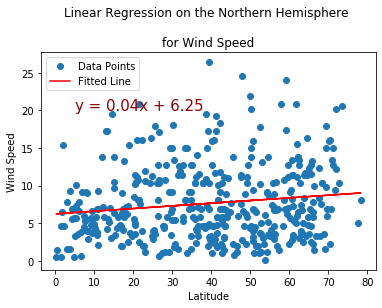

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression_2(x_values, y_values, '''Linear Regression on the Northern Hemisphere \n
for Wind Speed''', 'Wind Speed',(5,20))

R-squared: 0.002866
P-Value: 0.485522


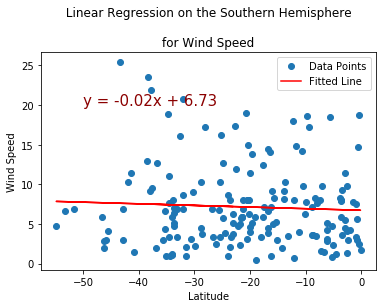

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression_2(x_values, y_values, ''' Linear Regression on the Southern Hemisphere \n
for Wind Speed''', 'Wind Speed',(-50,20))